# Digit recognition dataset
Working with MNIST digits recognition dataset, which has 10 classes, the digits 0-9. A reduced version of the MNIST dataset is one of scikit-learn's included datasets.<br>
Each sample is an 8x8 image representing a handwritten digit. Each pixel is represented by an integer in the range 0 to 16. Indicating varing levels of black.

In [31]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt

# Exploring the dataset

In [4]:
# load the digits dataset
digits = datasets.load_digits()

print(digits.keys())

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])


In [3]:
print(digits.DESCR)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

images contains 1797 samples of 8x8-pixel digit images

In [5]:
digits.images.shape

(1797, 8, 8)

The data is the flattened array of the 2D array image

In [6]:
digits.data.shape

(1797, 64)

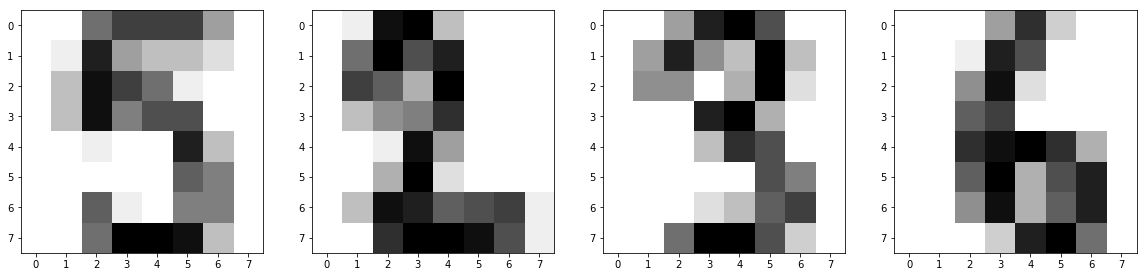

In [18]:
# Display digit 1010
plt.subplots(figsize=(20,5))
plt.subplot(141)
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r,interpolation='nearest');
plt.subplot(142)
plt.imshow(digits.images[1031], cmap=plt.cm.gray_r,interpolation='nearest');
plt.subplot(143)
plt.imshow(digits.images[1052], cmap=plt.cm.gray_r,interpolation='nearest');
plt.subplot(144)
plt.imshow(digits.images[1063], cmap=plt.cm.gray_r,interpolation='nearest');

# Train/Test Split

In [47]:
# Create feature and target arrays
X = digits.data
y = digits.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42, stratify=y)

# Fit/Predict/Accuracy

In [48]:
# Create a k-NN classifier with 7 neighbors
knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train, y_train)

print('Accuracy: {}'.format(knn.score(X_test, y_test)))

Accuracy: 0.9833333333333333


The accuracy is calculated by the number of correct prediction over total number of data points

In [49]:
(knn.predict(X_test) == y_test).sum() / len(X_test)

0.9833333333333333

# Overfitting and underfitting
To observe how the accuracy of train and test datasets vary by the numbers of neighbors

In [50]:
neighbors = np.arange(1, 11)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# for each k value
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train, y_train)
    
    # record the accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    # record the accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

Text(0,0.5,'Accuracy')

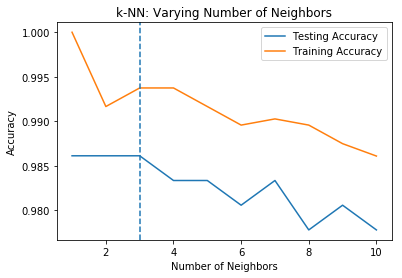

In [54]:
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training Accuracy')

plt.axvline(3, linestyle='dashed')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')

